# Configuration

In [1]:
import os
import sys
import h5py
import subprocess
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
# plt.rcParams['figure.constrained_layout.use'] = True
%load_ext autoreload
%autoreload 2

****************
**Define the locations of application folder, DART-PFLOTRAN interface folder, and the configuation file of interest**

In [2]:
# Main directory names
# app_par_dir  = "/Users/jian449/Codes/DART/manhattan/models/pflotran/applications"
# dart_dir     = "/Users/jian449/Codes/DART/manhattan"
# dart_pf_dir  = "/Users/jian449/Codes/DART/manhattan/models/pflotran"     # The dart pflotran utitlity folder name
# fig_dir      = "/Users/jian449/OneDrive - PNNL/Documents/Publications/2020DART_PFLOTRAN/simulation_plots"
# app_par_dir  = "/home/jian449/DART/manhattan/models/pflotran/applications"
app_par_dir  = "/mnt/4tbb/peishi/1dthermal_simulation/"
dart_dir     = "/home/jian449/DART/manhattan"
dart_pf_dir  = "/home/jian449/DART/manhattan/models/pflotran"     # The dart pflotran utitlity folder name
# fig_dir      = "/home/jian449/OneDrive - PNNL/Documents/Publications/2020DART_PFLOTRAN/simulation_plots"

# app_dir_name_list = ["1dthermal_perm_parastate_200pts_nospinup_1mda", 
#                      "1dthermal_perm_parastate_200pts_nospinup_2mda",
#                      "1dthermal_perm_parastate_200pts_nospinup_3mda", 
#                      "1dthermal_perm_parastate_200pts_nospinup_4mda"]
# app_dir_name_list_sort = ["1dthermal_perm_parastate_200pts_nospinup_sortobsin_1mda", 
#                           "1dthermal_perm_parastate_200pts_nospinup_sortobsin_2mda",
#                           "1dthermal_perm_parastate_200pts_nospinup_sortobsin_3mda", 
#                           "1dthermal_perm_parastate_200pts_nospinup_sortobsin_4mda"]

app_dir_name_list = ["1dthermal_perm_parastate_100pts_1mda", 
                     "1dthermal_perm_parastate_100pts_2mda",
                     "1dthermal_perm_parastate_100pts_3mda", 
                     "1dthermal_perm_parastate_100pts_4mda"]
app_dir_name_list_sort = ["1dthermal_perm_parastate_100pts_sortobsin_1mda", 
                          "1dthermal_perm_parastate_100pts_sortobsin_2mda",
                          "1dthermal_perm_parastate_100pts_sortobsin_3mda", 
                          "1dthermal_perm_parastate_100pts_sortobsin_4mda"]


# app_dir_name_list = ["1dthermal_perm_parastate_200pts_1mda_v2", 
#                      "1dthermal_perm_parastate_200pts_2mda_v2",
#                      "1dthermal_perm_parastate_200pts_3mda_v2", 
#                      "1dthermal_perm_parastate_200pts_4mda_v2"]
# app_dir_name_list_sort = ["1dthermal_perm_parastate_200pts_sortobsin_1mda_v2", 
#                           "1dthermal_perm_parastate_200pts_sortobsin_2mda_v2",
#                           "1dthermal_perm_parastate_200pts_sortobsin_3mda_v2", 
#                           "1dthermal_perm_parastate_200pts_sortobsin_4mda_v2"]

# app_dir_name_list = ["1dthermal_perm_parastate_800pts_nospinup_1mda",
#                      "1dthermal_perm_parastate_800pts_nospinup_2mda",
#                      "1dthermal_perm_parastate_800pts_nospinup_3mda",
#                      "1dthermal_perm_parastate_800pts_nospinup_4mda"]
# app_dir_name_list_sort = ["1dthermal_perm_parastate_800pts_nospinup_sortobsin_1mda",
#                           "1dthermal_perm_parastate_800pts_nospinup_sortobsin_2mda",
#                           "1dthermal_perm_parastate_800pts_nospinup_sortobsin_3mda",
#                           "1dthermal_perm_parastate_800pts_nospinup_sortobsin_4mda"]

# app_dir_name_list = ["1dthermal_perm_parastate_800pts_1mda", "1dthermal_perm_parastate_800pts_2mda",
#                      "1dthermal_perm_parastate_800pts_3mda", "1dthermal_perm_parastate_800pts_4mda"]
# app_dir_name_list_sort = ["1dthermal_perm_parastate_800pts_sortobsin_1mda", "1dthermal_perm_parastate_800pts_sortobsin_2mda",
#                           "1dthermal_perm_parastate_800pts_sortobsin_3mda", "1dthermal_perm_parastate_800pts_sortobsin_4mda"]


In [3]:
app_dir_list = [os.path.join(app_par_dir, app_dir_name) for app_dir_name in app_dir_name_list]          # The application folder name
app_dir_list_sort = [os.path.join(app_par_dir, app_dir_name) for app_dir_name in app_dir_name_list_sort]          # The application folder name

# Get the configuration file
config_file_list  = [os.path.join(app_dir, "work/config.nml") for app_dir in app_dir_list]
config_file_list_sort  = [os.path.join(app_dir, "work/config.nml") for app_dir in app_dir_list_sort]

****************
**Change the locations of the all the files saved in the original config_file according to the new defined locations if necessary (this is used for the case that the application folder is moved/copied from another location)**

In [4]:
change_path_name_files = os.path.join(dart_pf_dir, "utils/change_file_paths_in_confignml.py")
for i in range(len(app_dir_list)):
    app_dir, config_file = app_dir_list[i], config_file_list[i]
    subprocess.run("python {} {} {} {}".format(change_path_name_files, config_file, dart_pf_dir, app_dir),
                   shell=True, check=True)
for i in range(len(app_dir_list_sort)):
    app_dir, config_file = app_dir_list_sort[i], config_file_list_sort[i]
    subprocess.run("python {} {} {} {}".format(change_path_name_files, config_file, dart_pf_dir, app_dir),
                   shell=True, check=True)

****************
**Import the loading functions**

In [5]:
sys.path.append(dart_pf_dir)
from utils.plot_da_result import DaResults
dar_list = [DaResults(config_file) for config_file in config_file_list]
for i in range(len(app_dir_list)):
    dar_list[i].setup()
dar_list_sort = [DaResults(config_file) for config_file in config_file_list_sort]
for i in range(len(app_dir_list_sort)):
    dar_list_sort[i].setup()

# Permeability estimation over different iterations

In [33]:
# True value
perm_true = -10.41
timd_ind = -1

## Only posterior

Text(0.5, 1.0, 'posterior')

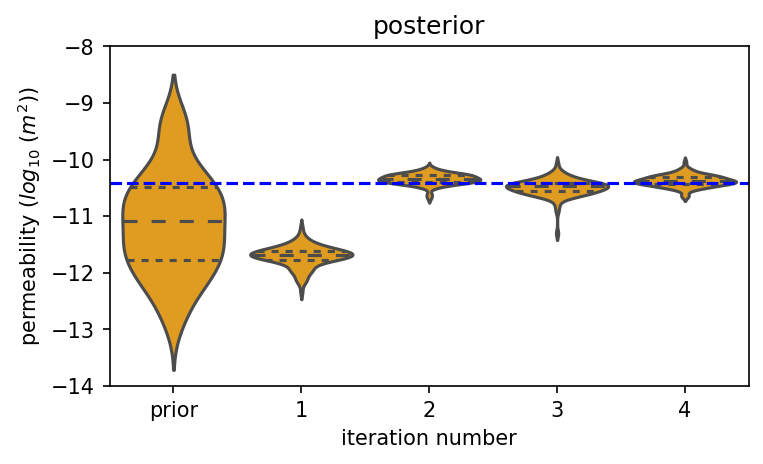

In [34]:
# Assemble data
perm_df = pd.DataFrame(columns=["value","mda"])
perm_value_prior  = dar_list[0].prior['para'][0,0,:,timd_ind,0]
nens = dar_list[0].nens
perm_df_mda = pd.DataFrame(np.array([perm_value_prior,np.zeros(nens)]).T,columns=["value","mda"])
perm_df = perm_df.append(perm_df_mda)
for i in range(len(app_dir_list)):
    nens = dar_list_sort[i].nens
    perm_value_post  = dar_list[i].posterior['para'][0,-1,:,timd_ind,0]
#     perm_value_prior  = dar_list[i].prior['para'][0,:,0,0]
    perm_df_mda = pd.DataFrame(np.array([perm_value_post,np.ones(nens)*(i+1)]).T,columns=["value","mda"])
    perm_df = perm_df.append(perm_df_mda)
perm_df = perm_df.astype({"value":float,"mda":int})

# Plot
_, ax = plt.subplots(1, 1, figsize=(5.5,3), dpi=150)
ax = sns.violinplot(x="mda",y="value",data=perm_df,inner="quartile",
                    scale="width", color='orange')
ax.axhline(y=perm_true, linestyle='--', color='blue')
ax.set_xticklabels(['prior', "1", "2", "3", "4"])
ax.set_xlabel('iteration number')
ax.set_ylim([-14,-8])
ax.set_ylabel('permeability ($log_{10}$ ($m^2$))')
ax.set_title('posterior')
#                     palette="Set2", split=True,
#                     scale="count", inner="stick",
#                     scale_hue=False, bw=.2)

## Only prior

Text(0.5, 1.0, 'prior')

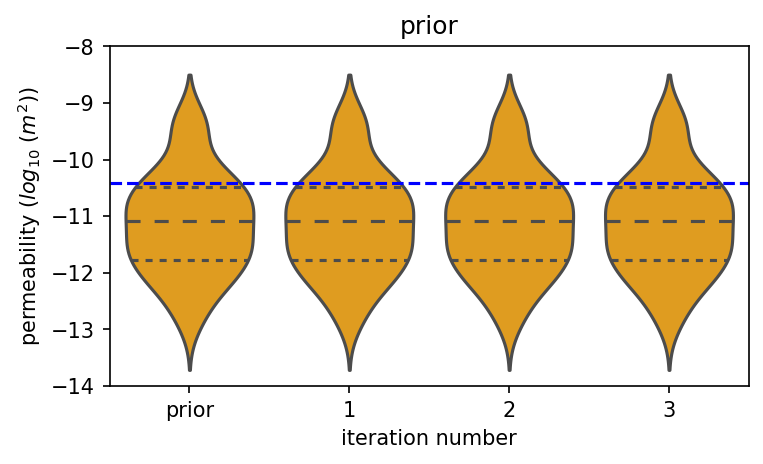

In [35]:
# Assemble data
perm_df = pd.DataFrame(columns=["value","mda"])
for i in range(len(app_dir_list)):
    nens = dar_list[i].nens
    perm_value_prior  = dar_list[i].prior['para'][0,0,:,timd_ind,0]
    perm_df_mda = pd.DataFrame(np.array([perm_value_prior,np.ones(nens)*(i+1)]).T, 
                               columns=["value","mda"])
    perm_df = perm_df.append(perm_df_mda)
perm_df = perm_df.astype({"value":float,"mda":int})

# Plot
_, ax = plt.subplots(1, 1, figsize=(5.5,3), dpi=150)
ax = sns.violinplot(x="mda", y="value", data=perm_df,inner="quartile",color='orange')
ax.axhline(y=perm_true, linestyle='--', color='b')
ax.set_xticklabels(['prior', "1", "2", "3", "4"])
ax.set_xlabel('iteration number')
ax.set_ylim([-14,-8])
ax.set_ylabel('permeability ($log_{10}$ ($m^2$))')
ax.set_title('prior')

## Prior and posterior

In [36]:
# # Assemble data
# perm_df = pd.DataFrame(columns=["value","mda","type"])

# for i in range(4):
#     perm_value_prior = dar_list[i].prior['para'][0,0,:,0,0]
#     perm_value_post  = dar_list[i].posterior['para'][0,-1,:,-1,0]
#     prior_str, post_str = ["prior"]*nens, ["posterior"]*nens
#     perm_df_mda1 = pd.DataFrame(np.array([perm_value_prior,np.ones(nens)*(i+1),prior_str]).T, 
#                                columns=["value","mda","type"])
#     perm_df_mda2 = pd.DataFrame(np.array([perm_value_post,np.ones(nens)*(i+1), post_str]).T, 
#                                columns=["value","mda","type"])
#     perm_df = perm_df.append(perm_df_mda1)
#     perm_df = perm_df.append(perm_df_mda2)
# perm_df = perm_df.astype({"value":float,"mda":float,"type":str})
# perm_df = perm_df.astype({"mda":int})

# # Plot
# _, ax = plt.subplots(1, 1, figsize=(4,2), dpi=150)
# ax = sns.violinplot(x="mda", y="value",hue='type',split=True,
#                     palette="Set2",data=perm_df,scale='width')
# ax.axhline(y=perm_true, linestyle='--')
# ax.set_ylim([-14,-8])
# ax.set_ylabel('Permeability ($log_{10}$ ($m^2$))')


# Four iteration result

In [37]:
dar4 = dar_list[3]
nens = dar4.nens

## Plot the evolution of different iterations

Text(0, 0.5, 'permeability ($log_{10}$ ($m^2$))')

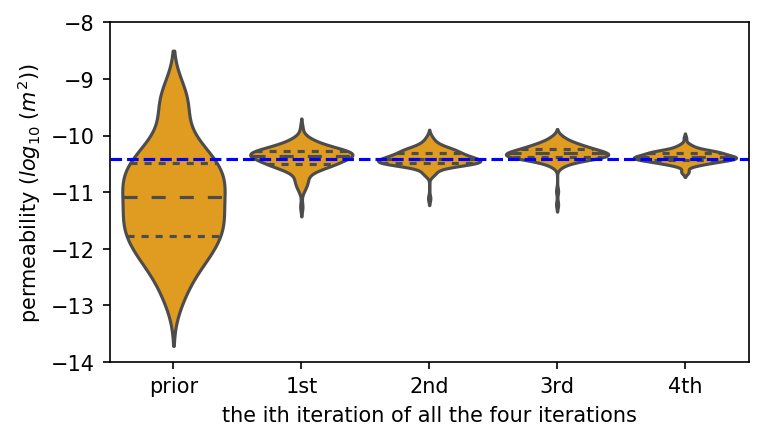

In [38]:
# Assemble data
perm_df_4mda = pd.DataFrame(columns=["value","mda"])
perm_value_prior = dar4.prior['para'][0,0,:,timd_ind,0]
perm_df_mda1 = pd.DataFrame(np.array([perm_value_prior,np.zeros(nens)]).T,columns=["value","mda"])
perm_df_4mda = perm_df_4mda.append(perm_df_mda1)
perm_value_prior = dar4.prior['para'][0,0,:,0,0]
for i in range(dar4.total_mda_iterations):
    perm_value_post = dar4.posterior['para'][0,i,:,timd_ind,0]
    perm_df_mda2 = pd.DataFrame(np.array([perm_value_post,np.ones(nens)*(i+1),]).T,columns=["value","mda"])
    perm_df_4mda = perm_df_4mda.append(perm_df_mda2)
perm_df_4mda = perm_df_4mda.astype({"value":float,"mda":int})

# Plot
_, ax = plt.subplots(1, 1, figsize=(5.5,3), dpi=150)
ax = sns.violinplot(x="mda", y="value",split=True,
                    data=perm_df_4mda,scale="width",inner="quartile",color="orange")
ax.set_xticklabels(['prior', "1st", "2nd", "3rd", "4th"])
ax.set_xlabel('the ith iteration of all the four iterations')
ax.axhline(y=perm_true, linestyle='--', color='blue')
ax.set_ylim([-14,-8])
ax.set_ylabel('permeability ($log_{10}$ ($m^2$))')


## Evolution of prior versus posterior

Text(0, 0.5, 'permeability ($log_{10}$ ($m^2$))')

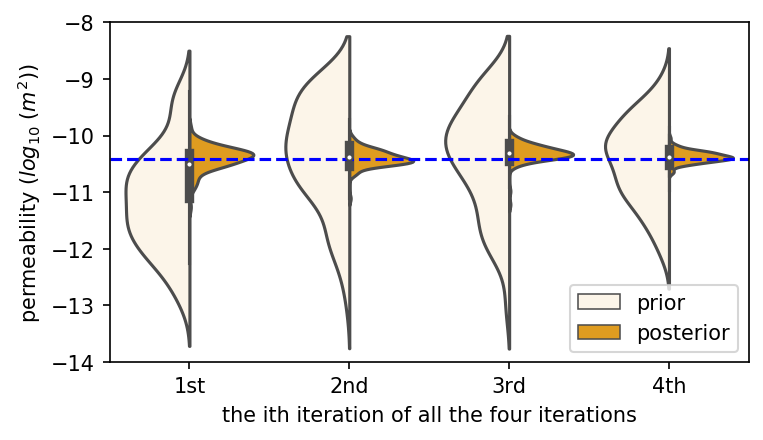

In [39]:
# Assemble data
perm_df = pd.DataFrame(columns=["value","mda","type"])

for i in range(dar4.total_mda_iterations):
    perm_value_prior = dar4.prior['para'][0,i,:,timd_ind,0]
    perm_value_post  = dar4.posterior['para'][0,i,:,timd_ind,0]
    prior_str, post_str = ["prior"]*nens, ["posterior"]*nens
    perm_df_mda1 = pd.DataFrame(np.array([perm_value_prior,np.ones(nens)*(i+1),prior_str]).T, 
                               columns=["value","mda","type"])
    perm_df_mda2 = pd.DataFrame(np.array([perm_value_post,np.ones(nens)*(i+1), post_str]).T, 
                               columns=["value","mda","type"])
    perm_df = perm_df.append(perm_df_mda1)
    perm_df = perm_df.append(perm_df_mda2)
perm_df = perm_df.astype({"value":float,"mda":float,"type":str})
perm_df = perm_df.astype({"mda":int})

# Plot
_, ax = plt.subplots(1, 1, figsize=(5.5,3), dpi=150)
ax = sns.violinplot(x="mda", y="value",hue='type',split=True,
                    color="orange",data=perm_df,scale='width')
ax.axhline(y=perm_true, linestyle='--', color='blue')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower right')
ax.set_xticklabels(["1st", "2nd", "3rd", "4th"])
ax.set_xlabel('the ith iteration of all the four iterations')
ax.set_ylim([-14,-8])
ax.set_ylabel('permeability ($log_{10}$ ($m^2$))')


# Comparison to without sort_obs_inc

## Over different iterations

Text(0, 0.5, 'permeability ($log_{10}$ ($m^2$))')

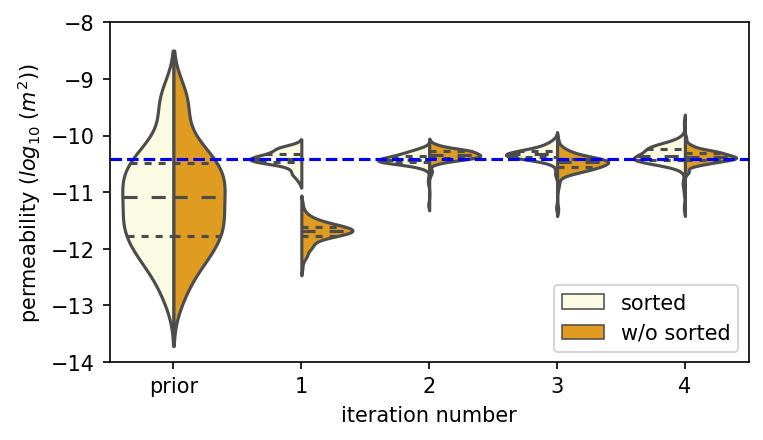

In [57]:
# Assemble data
sort, nosort = ["sorted"]*nens, ["w/o sorted"]*nens
perm_df = pd.DataFrame(columns=["value","mda","type"])

# sorted
perm_value_prior  = dar_list_sort[0].prior['para'][0,0,:,timd_ind,0]
perm_df_mda = pd.DataFrame(np.array([perm_value_prior,np.zeros(nens),sort]).T,
                           columns=["value","mda","type"])
perm_df = perm_df.append(perm_df_mda)
for i in range(len(app_dir_list_sort)):
    nens = dar_list_sort[i].nens
    perm_value_post  = dar_list_sort[i].posterior['para'][0,-1,:,timd_ind,0]
    perm_df_mda = pd.DataFrame(np.array([perm_value_post,np.ones(nens)*(i+1),sort]).T,
                               columns=["value","mda","type"])
    perm_df = perm_df.append(perm_df_mda)

# without sorting
perm_value_prior  = dar_list[0].prior['para'][0,0,:,timd_ind,0]
perm_df_mda = pd.DataFrame(np.array([perm_value_prior,np.zeros(nens),nosort]).T,
                           columns=["value","mda","type"])
perm_df = perm_df.append(perm_df_mda)
for i in range(len(app_dir_list)):
    nens = dar_list[i].nens
    perm_value_post  = dar_list[i].posterior['para'][0,-1,:,timd_ind,0]
    perm_df_mda = pd.DataFrame(np.array([perm_value_post,np.ones(nens)*(i+1),nosort]).T,
                               columns=["value","mda","type"])
    perm_df = perm_df.append(perm_df_mda)

perm_df = perm_df.astype({"value":float,"mda":float,"type":str})
perm_df = perm_df.astype({"mda":int})

# Plot
_, ax = plt.subplots(1, 1, figsize=(5.5,3), dpi=150)
ax = sns.violinplot(x="mda",y="value",hue='type',split=True,
                    data=perm_df,inner="quartile",scale="width",
                    palette={"sorted": "lightyellow", "w/o sorted": "orange"})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower right')
ax.axhline(y=perm_true, linestyle='--', color='blue')
ax.set_xticklabels(['prior', "1", "2", "3", "4"])
ax.set_xlabel('iteration number')
ax.set_ylim([-14,-8])
ax.set_ylabel('permeability ($log_{10}$ ($m^2$))')
# ax.set_title('posterior')
#                     palette="Set2", split=True,
#                     scale="count", inner="stick",
#                     scale_hue=False, bw=.2)

## Four iterations

In [58]:
dar4_sort, dar4 = dar_list_sort[-1], dar_list[-1]
nens = dar4.nens

Text(0, 0.5, 'permeability ($log_{10}$ ($m^2$))')

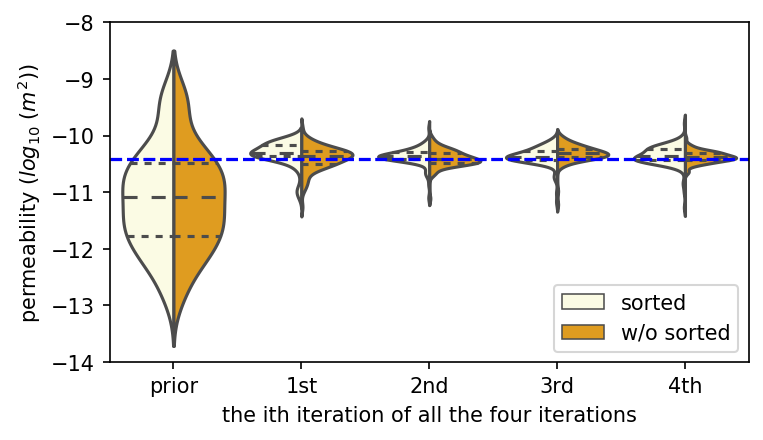

In [59]:
# Assemble data
sort, nosort = ["sorted"]*nens, ["w/o sorted"]*nens
perm_df_4mda = pd.DataFrame(columns=["value","mda","type"])

# Sorted
perm_value_prior = dar4_sort.prior['para'][0,0,:,timd_ind,0]
perm_df_mda1 = pd.DataFrame(np.array([perm_value_prior,np.zeros(nens),sort]).T,
                            columns=["value","mda","type"])
perm_df_4mda = perm_df_4mda.append(perm_df_mda1)
for i in range(dar4.total_mda_iterations):
    perm_value_post = dar4_sort.posterior['para'][0,i,:,timd_ind,0]
    perm_df_mda2 = pd.DataFrame(np.array([perm_value_post,np.ones(nens)*(i+1),sort]).T,
                                columns=["value","mda","type"])
    perm_df_4mda = perm_df_4mda.append(perm_df_mda2)


# Without sorting
perm_value_prior = dar4.prior['para'][0,0,:,timd_ind,0]
perm_df_mda1 = pd.DataFrame(np.array([perm_value_prior,np.zeros(nens),nosort]).T,
                            columns=["value","mda","type"])
perm_df_4mda = perm_df_4mda.append(perm_df_mda1)
for i in range(dar4.total_mda_iterations):
    perm_value_post = dar4.posterior['para'][0,i,:,timd_ind,0]
    perm_df_mda2 = pd.DataFrame(np.array([perm_value_post,np.ones(nens)*(i+1),nosort]).T,
                                columns=["value","mda","type"])
    perm_df_4mda = perm_df_4mda.append(perm_df_mda2)

perm_df_4mda = perm_df_4mda.astype({"value":float,"mda":float,"type":str})
perm_df_4mda = perm_df_4mda.astype({"mda":int})


# Plot
_, ax = plt.subplots(1, 1, figsize=(5.5,3), dpi=150)
ax = sns.violinplot(x="mda", y="value",hue="type", split=True,
                    data=perm_df_4mda,scale="width",inner="quartile",
                    palette={"sorted": "lightyellow", "w/o sorted": "orange"})
ax.legend(handles, labels, loc='lower right')
ax.axhline(y=perm_true, linestyle='--', color='blue')
ax.set_xticklabels(['prior', "1st", "2nd", "3rd", "4th"])
ax.set_xlabel('the ith iteration of all the four iterations')
ax.axhline(y=perm_true, linestyle='--', color='blue')
ax.set_ylim([-14,-8])
ax.set_ylabel('permeability ($log_{10}$ ($m^2$))')
